# Assignment 5: Dimensionality Reduction & Visualization

This assignment will give you a chance to practice using some of the unsupervised learning methods implemented in scikit-learn, as well as give you a chance to play around with some of the visualization tools provided by matplotlib.  Keep in mind that there are other libraries out there for visualization (and for machine learning in general); this is not the full extent of what is possible, just an introduction.

*Note that this assignment includes a bunch of worked examples, intermixed with the actual homework problems.  Look for **"todo"** to find places you need to provide code or answers.*

**CSC 8515 - Machine Learning  
Assignment 5
Scaffolding by Dr. Ben Mitchell  
Assignment completed by: James Fung **

In [1]:
import numpy as np

# import sklearn stuff
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# set up for plotting as interactive figures in the notebook
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load some data
This time, we're going to load a couple of data sets to play with.  First, we'll load our old friend the Iris dataset, but then we'll load another dataset that's a bit higher dimensional, and allows other kinds of visualizations.  

In [2]:
# load the iris dataset
iris = datasets.load_iris()

In [3]:
# note that the iris data is 4-dimensional
iris.data.shape

(150, 4)

In [4]:
# let's look at the first 10 elements
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

## Plot the data
Since the iris dataset has 4 features, we'll need to plot them as pairs; we can use color to represent class label.  Here is an example of plotting the first two dimensions:

<IPython.core.display.Javascript object>


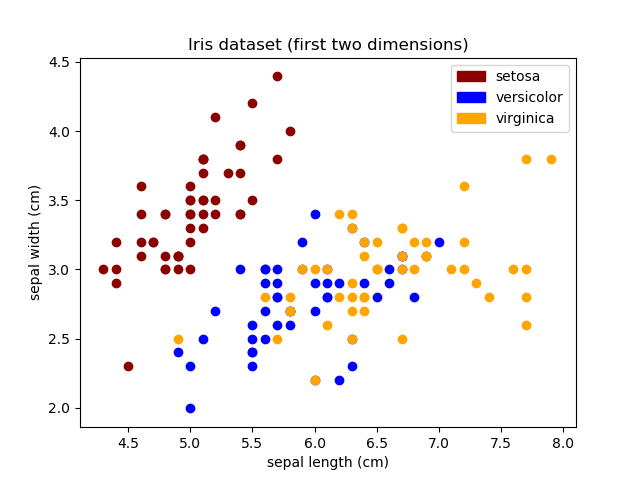

In [5]:
plt.figure() # make a new figure to plot in
# let's set up a list of colors for the different class labels:
colors = ['darkred', 'blue', 'orange']
# now we'll loop over the points in our data set, and plot them one at a time
for i in range(len(iris.data)):
    # use the first 2 dimensions as our x and y coordinates
    x = iris.data[i][0]
    y = iris.data[i][1]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)

# now let's add some axis labels; we'll use the names from the data set
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
# now actually show the legend
plt.legend(handles=[red, blue, orange])

# let's add a title
plt.title('Iris dataset (first two dimensions)')

# Plot the other combinations of axes
You will need a total of 6 plots (including the one above) to plot all possible combinations of dimensions; the remaining 5 are left to you, but you should be able to copy the example above and make minor modifications to it.

<IPython.core.display.Javascript object>


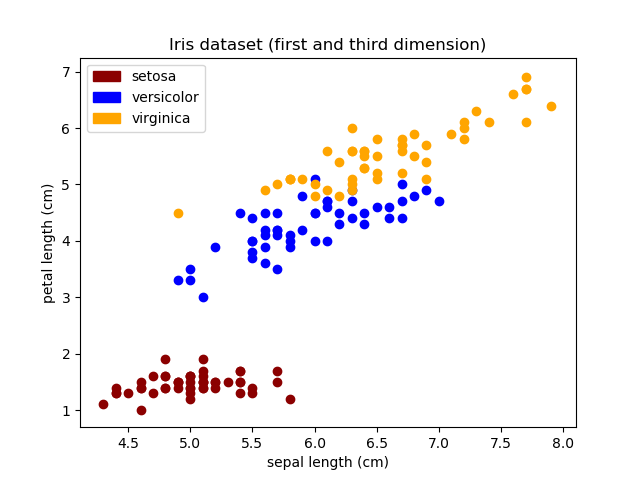

In [6]:
plt.figure()
colors = ['darkred', 'blue', 'orange']
for i in range(len(iris.data)):
    x = iris.data[i][0]
    y = iris.data[i][2]
    c = colors[iris.target[i]]
    plt.scatter(x, y, color=c)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
plt.legend(handles=[red, blue, orange])

plt.title('Iris dataset (first and third dimension)')

<IPython.core.display.Javascript object>


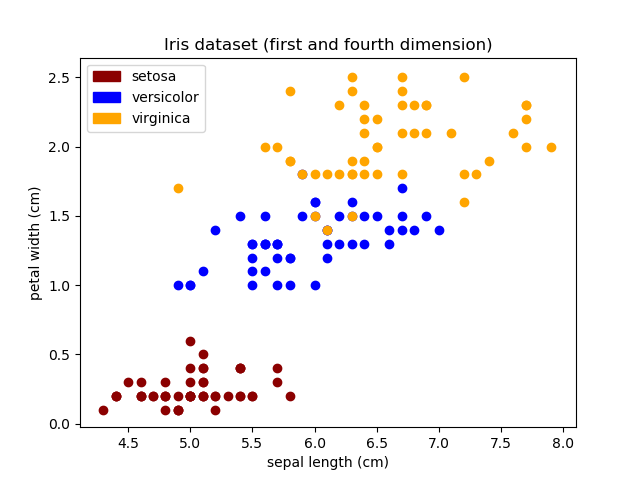

In [7]:
plt.figure()
colors = ['darkred', 'blue', 'orange']
for i in range(len(iris.data)):
    x = iris.data[i][0]
    y = iris.data[i][3]
    c = colors[iris.target[i]]
    plt.scatter(x, y, color=c)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
plt.legend(handles=[red, blue, orange])

plt.title('Iris dataset (first and fourth dimension)')

<IPython.core.display.Javascript object>


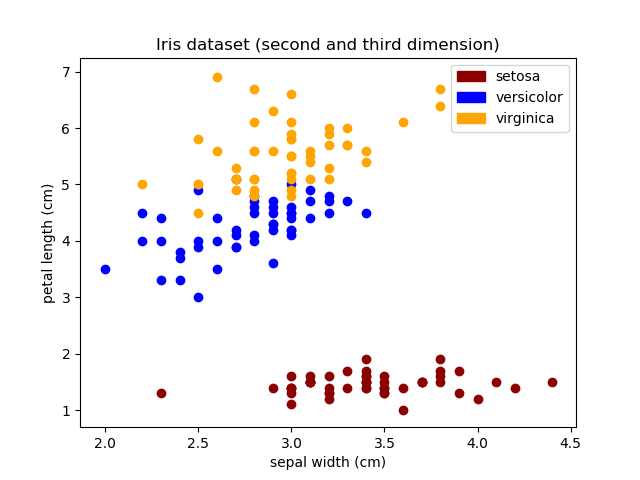

In [8]:
plt.figure()
colors = ['darkred', 'blue', 'orange']
for i in range(len(iris.data)):
    x = iris.data[i][1]
    y = iris.data[i][2]
    c = colors[iris.target[i]]
    plt.scatter(x, y, color=c)

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
plt.legend(handles=[red, blue, orange])

plt.title('Iris dataset (second and third dimension)')

<IPython.core.display.Javascript object>


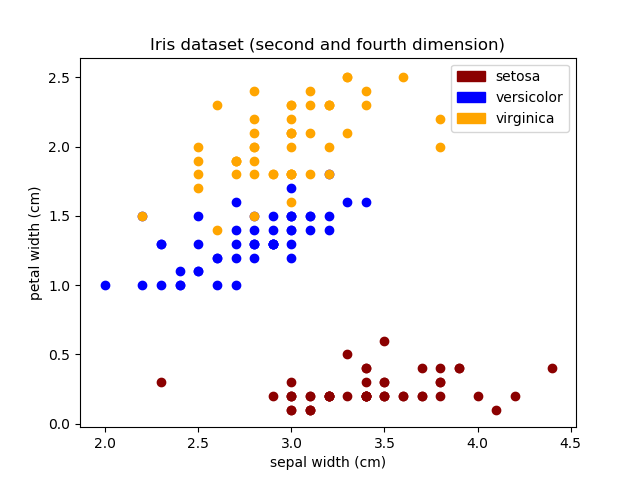

In [9]:
plt.figure()
colors = ['darkred', 'blue', 'orange']
for i in range(len(iris.data)):
    x = iris.data[i][1]
    y = iris.data[i][3]
    c = colors[iris.target[i]]
    plt.scatter(x, y, color=c)

plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
plt.legend(handles=[red, blue, orange])

plt.title('Iris dataset (second and fourth dimension)')

<IPython.core.display.Javascript object>


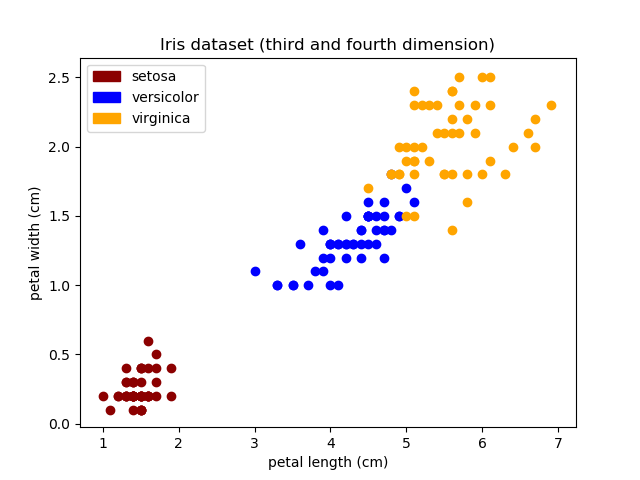

In [10]:
plt.figure()
colors = ['darkred', 'blue', 'orange']
for i in range(len(iris.data)):
    x = iris.data[i][2]
    y = iris.data[i][3]
    c = colors[iris.target[i]]
    plt.scatter(x, y, color=c)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
red = mpatches.Patch(color='darkred', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='orange', label='virginica')
plt.legend(handles=[red, blue, orange])

plt.title('Iris dataset (third and fourth dimension)')

# Which one seems the most useful?
Which of these plots seems the best, and why? Write your answer (using Markdown) below:

***

I would say either the first and third dimension or third and fourth dimension are the most useful. The plots for those dimensions show clear seperation (minus a few points) between setosa, versicolor, and virginica flowers - an important characteristic for some of the classifiers we have so far learned. 

## Run PCA
Here, we'll apply principal component analysis (PCA) to the dataset.  We'll use `n_components=2` to indicate we want to reduce our dimensionality to 2

In [11]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(iris.data)
# transform our data using the learned transform
iris2d = eigenbasis.transform(iris.data)

In [12]:
# note that our transformed dat is now 2-dimensional
iris2d.shape

(150, 2)

In [13]:
# again, let's look at the first 10 elements; note that they are 2 dimensional, rather than 4
iris2d[:10]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

### Examining components
We can look at the actual "principal components," which we're using as the basis for our transformed data space.  Since each component is a vector in the original data space, we can see what "axis" in the original space is the one of primary variance.

Since we said to use the top 2 components, we're going to have two vectors, each of length 4 (since our original data was 4 dimensional).

We can also show the amount of the total variance explained by each component, which tells us how "important" they are.

In [14]:
# the actual components
print("principal components:\n", pca.components_)
# let's also look at how much of the total variance we were able to cover with 2 dimensions
print('percentage of variance explained by first 2 principal components:', pca.explained_variance_ratio_)

principal components:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
percentage of variance explained by first 2 principal components: [ 0.92461621  0.05301557]


## Make a plot of the 2D "transformed" data
 First, here's an example adapted from http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

<IPython.core.display.Javascript object>


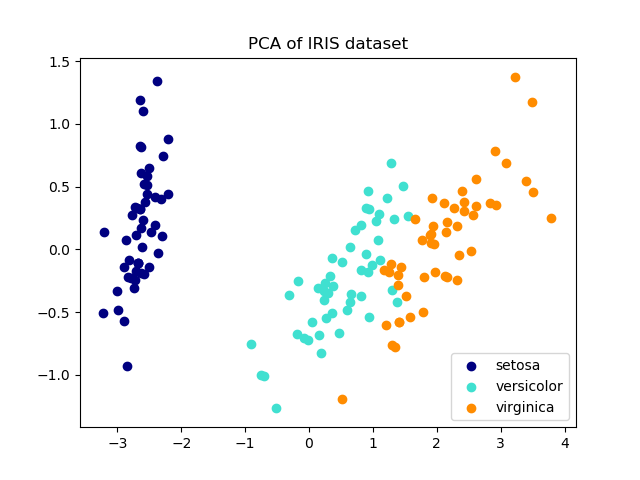

In [15]:
# make a new figure
plt.figure()
# pick some colors to use
colors = ['navy', 'turquoise', 'darkorange']

# plot our points with colors and labels
for color, i, iris.target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(iris2d[iris.target == i, 0], iris2d[iris.target == i, 1], color=color, label=iris.target_name)
plt.legend(loc='best')
plt.title('PCA of IRIS dataset')

<IPython.core.display.Javascript object>


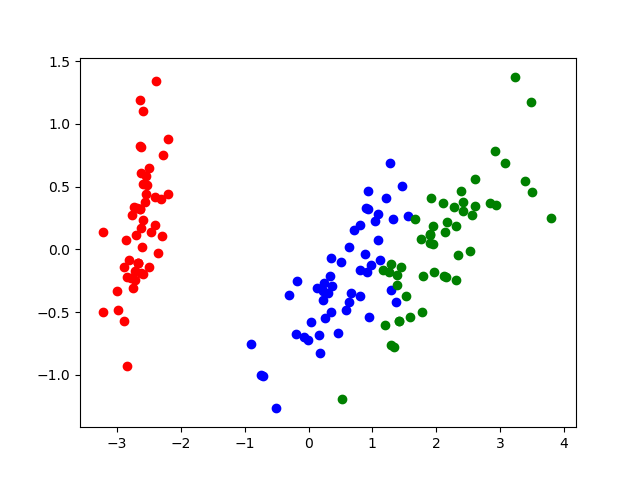

In [16]:
# here's an alternative version of plotting this data that may be easier to understand:
colors = ['red', 'blue', 'green']
plt.figure()
# loop over examples, and plot each one
for i in range(len(iris2d)):
    point = iris2d[i]
    classLabel = iris.target[i]
    # plot a dot at an (x, y) coordinate, using the specified color.
    plt.scatter(point[0], point[1], color=colors[classLabel])

# Compare this to the 6 plots from before
Does this plot seem "better" than the plots we made before using the original axes?  Explain the *pros* and *cons* of the two ways of visualizing the data (note that you should have at minimum one of each):

***

Visually, the plot only seems marginally better than the chosen plot from before. There are still a few points in virginica and versicolor that overlap.

The pros to this method is that we now only need one plot to visualize the data as opposed to six different plots. However, a major con is that the transformed data is non-interpretable in the original context, as the axis are no longer length and width.

# Now let's try a different dataset
Here, we'll work with a set of small "pictures" of handwritten numeric digits.  Note that this is a miniature version; most real-world image datasets are much bigger (both in dimensionality and number of examples), but the same principles will apply.

In [17]:
# load a dataset composed of small images of written numbers
digits = datasets.load_digits()

In [18]:
# let's take a look at the shape of the dataset
digits.data.shape

(1797, 64)

In [19]:
# let's look at a random example; note that it's just a single vector with 64 elements
print('label is :', digits.target[20])
digits.data[20]

label is : 0


array([  0.,   0.,   3.,  13.,  11.,   7.,   0.,   0.,   0.,   0.,  11.,
        16.,  16.,  16.,   2.,   0.,   0.,   4.,  16.,   9.,   1.,  14.,
         2.,   0.,   0.,   4.,  16.,   0.,   0.,  16.,   2.,   0.,   0.,
         0.,  16.,   1.,   0.,  12.,   8.,   0.,   0.,   0.,  15.,   9.,
         0.,  13.,   6.,   0.,   0.,   0.,   9.,  14.,   9.,  14.,   1.,
         0.,   0.,   0.,   2.,  12.,  13.,   4.,   0.,   0.])

In [20]:
# note that we can 'reshape' this data to get a 2D array (i.e. matrix) with those values
mat = np.reshape(digits.data[20], [8,8])
mat

array([[  0.,   0.,   3.,  13.,  11.,   7.,   0.,   0.],
       [  0.,   0.,  11.,  16.,  16.,  16.,   2.,   0.],
       [  0.,   4.,  16.,   9.,   1.,  14.,   2.,   0.],
       [  0.,   4.,  16.,   0.,   0.,  16.,   2.,   0.],
       [  0.,   0.,  16.,   1.,   0.,  12.,   8.,   0.],
       [  0.,   0.,  15.,   9.,   0.,  13.,   6.,   0.],
       [  0.,   0.,   9.,  14.,   9.,  14.,   1.,   0.],
       [  0.,   0.,   2.,  12.,  13.,   4.,   0.,   0.]])

<IPython.core.display.Javascript object>


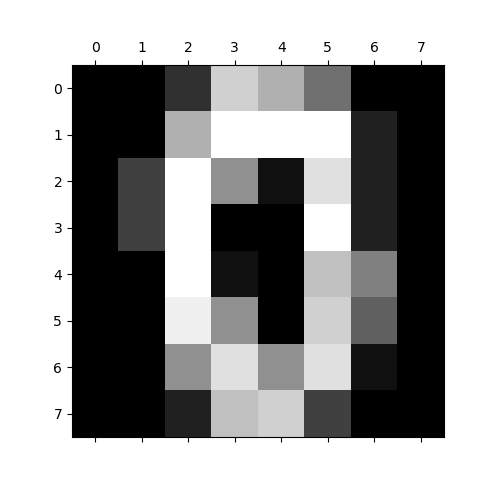

In [21]:
# we can also ask matplotlib to treat these examples as images (which they are), and plot one:
plt.gray() # use gray levels rather than colors
plt.matshow(mat) # show a matrix (i.e. 2D array) as visual values

# Visualize this data
Note that we can't realistically visualize all pairs of axes, there's way too many (though we can look at example images as shown above).  However, we can still do PCA and do a scatterplot of the first two dimensions, which is what you should do next.  Note that there are now going to be 10 different classes (the digits 0 through 9), so you'll need to pick some more colors to give each class its own color.  Try to ensure that the colors are visually distinct; here's a link to some colored patches along with their CSS names (which pyplot will recognise) http://www.crockford.com/wrrrld/color.html

In [22]:
eigenbasis_digits = pca.fit(digits.data)
mat2d = eigenbasis.transform(digits.data)

<IPython.core.display.Javascript object>


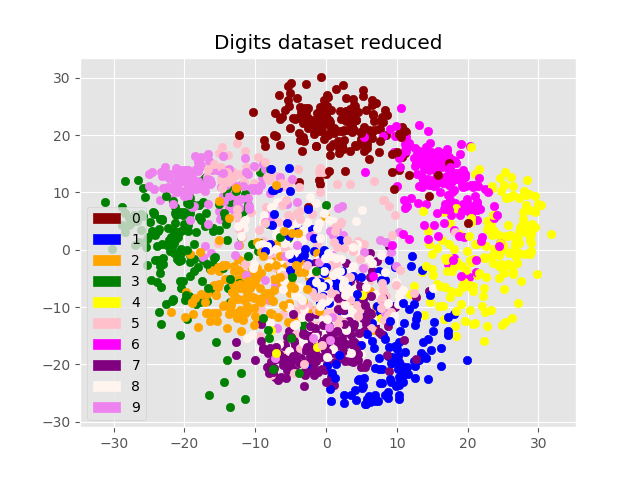

In [23]:
#Create the plot.
plt.figure()
plt.style.use("ggplot")
colors = ['darkred', 'blue', 'orange','green','yellow','pink','magenta','purple','seashell','violet']

for i in range(len(mat2d)):
    classLabel=digits.target[i]
    plt.scatter(mat2d[i][0],mat2d[i][1],color=colors[classLabel])

#Create a legend and title.
darkred = mpatches.Patch(color='darkred', label='0')
blue = mpatches.Patch(color='blue', label='1')
orange = mpatches.Patch(color='orange', label='2')
green = mpatches.Patch(color='green',label='3')
yellow = mpatches.Patch(color='yellow',label='4')
pink = mpatches.Patch(color='pink',label='5')
magenta = mpatches.Patch(color='magenta',label='6')
purple = mpatches.Patch(color='purple',label='7')
seashell = mpatches.Patch(color='seashell',label='8')
violet = mpatches.Patch(color='violet',label='9')
plt.legend(handles=[darkred,blue,orange,green,yellow,pink,magenta,purple,seashell,violet])
plt.title('Digits dataset reduced')

## What do you see?
Examine the plot you've made, and desribe what information about the nature of the data you can glean from the plot:

*** 

For the most part, the dimensionally reduced digits show clear seperation from one another in the form of clusters. The only exception to this is the number 5, which is sort of just scattered in the middle of all of the clusters of digits.

## Visualizing components
Another thing we can do with PCA is to look at the principle components themselves.  Since each component is a vector in the original data space, we can view them the same way we did the original vectors; in this case, as images.

Try pulling out each of the top two components separately, and visualizing each of them as an image.  _HINT_: you should be able to do this by adapting code from earlier, when we showed first how to access the components, and later how to transform a 1D array to a 2D array and visualize it as an image.

<IPython.core.display.Javascript object>


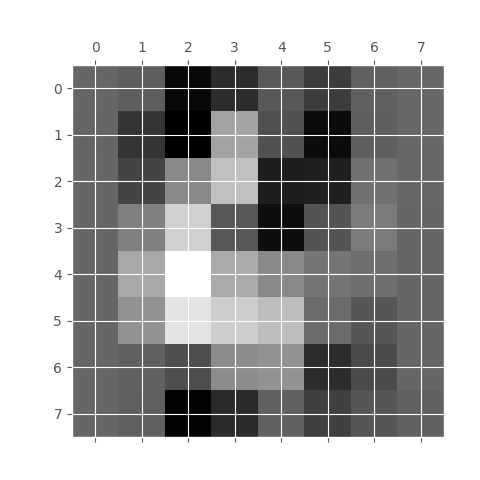

In [24]:
firstcomp = np.reshape(pca.components_[0],[8,8])
plt.gray()
plt.matshow(firstcomp)

<IPython.core.display.Javascript object>


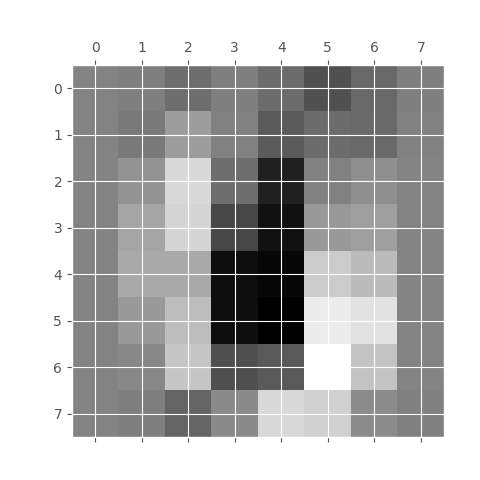

In [25]:
seccomp = np.reshape(pca.components_[1],[8,8])
plt.gray()
plt.matshow(seccomp)